## Problem Statement

### Context

When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men's and women's shoes, and grouping products together to identify similarities and differences between the product range of these renowned brands.

### Objective

To perform an exploratory data analysis and cluster the products based on various factors


### Key Questions

- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?


### Data Description

The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

## Reading the Dataset

In [2]:
# loading the dataset
data = pd.read_csv("/content/data_add.csv")

## Overview of the Dataset

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [3]:
data.shape

(3151, 5)

* The dataset has 3268 rows and 8 columns 

### Displaying few rows of the dataset

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Listing_Price,Sale_Price,Discount,Rating,Reviews
45,-0.605542,-0.628837,0.540973,0.447948,0.195305
610,-0.055377,0.483060,-1.241622,-1.302097,-0.891703
1463,-1.201555,-0.715105,-1.241622,1.250052,0.419101
2401,0.632329,0.147574,0.540973,-0.208319,0.387130
432,-0.743084,-0.834922,0.986622,0.375030,-0.348199
1038,-0.147071,-0.341278,0.540973,-0.135400,-0.444112
1000,-1.132784,-0.643215,-1.241622,-0.427075,1.314285
1395,1.320036,0.243427,0.986622,-0.354156,1.250343
1322,0.632329,-0.379379,1.432271,0.593785,1.570051
1657,-1.591255,-1.122481,-1.241622,-0.499993,0.610926


### Creating a copy of original data

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [6]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3151 entries, 0 to 3150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Listing_Price  3151 non-null   float64
 1   Sale_Price     3151 non-null   float64
 2   Discount       3151 non-null   float64
 3   Rating         3151 non-null   float64
 4   Reviews        3151 non-null   float64
dtypes: float64(5)
memory usage: 123.2 KB


### Statistical summary of the dataset

In [7]:
df.describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,3.151000e+03,3.151000e+03,3.151000e+03,3.151000e+03,3.151000e+03
mean,-1.623582e-16,9.019901e-17,1.443184e-16,-1.443184e-16,-5.411941e-17
std,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00
min,-1.682949e+00,-1.326169e+00,-1.241622e+00,-2.395876e+00,-1.339295e+00
25%,-7.430837e-01,-7.151051e-01,-1.241622e+00,-4.999931e-01,-9.556451e-01
50%,-1.470713e-01,-3.316922e-01,5.409733e-01,2.291925e-01,-6.046152e-02
75%,6.314124e-01,4.351337e-01,9.866221e-01,8.125409e-01,8.666929e-01
max,6.478064e+00,7.312843e+00,1.432271e+00,1.250052e+00,5.790203e+00


**Observations**

- 0 in the listing price indicates missing values.
- The average listing price is 7046.
- The average sale price is 5983.
- The average discount is 28%.
- The average rating is 3.3.
- The average number of reviews is 42.

In [8]:
# checking missing values
df.isna().sum()

Listing_Price    0
Sale_Price       0
Discount         0
Rating           0
Reviews          0
dtype: int64

- There are no missing values in the data.

In [10]:
# variables used for clustering
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [11]:
subset_scaled_df = df.copy()

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [13]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.639181888691826.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6503937785689771.
Cophenetic correlation for Euclidean distance and average linkage is 0.7700688853856603.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6315826175898259.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5854266041780846.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6356904073599116.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7336779287905082.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.6442825706397379.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6325008742275655.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5639963313399393.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7448498610849361.
Cophenetic cor

In [14]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7790459079526298, which is obtained with Cityblock distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [15]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.639181888691826.
Cophenetic correlation for complete linkage is 0.6503937785689771.
Cophenetic correlation for average linkage is 0.7700688853856603.
Cophenetic correlation for centroid linkage is 0.7560314837579893.
Cophenetic correlation for ward linkage is 0.5536562414624637.
Cophenetic correlation for weighted linkage is 0.6315826175898259.


In [16]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7700688853856603, which is obtained with average linkage.


**Observations**

- We see that the cophenetic correlation is maximum with cityblock distance, which is the Manhattan distance, and average linkage.
- The cophenetic correlation with Euclidean distance and average linkage is slightly less than the combination with maximum cophenetic correlation. 




### Checking Dendrograms

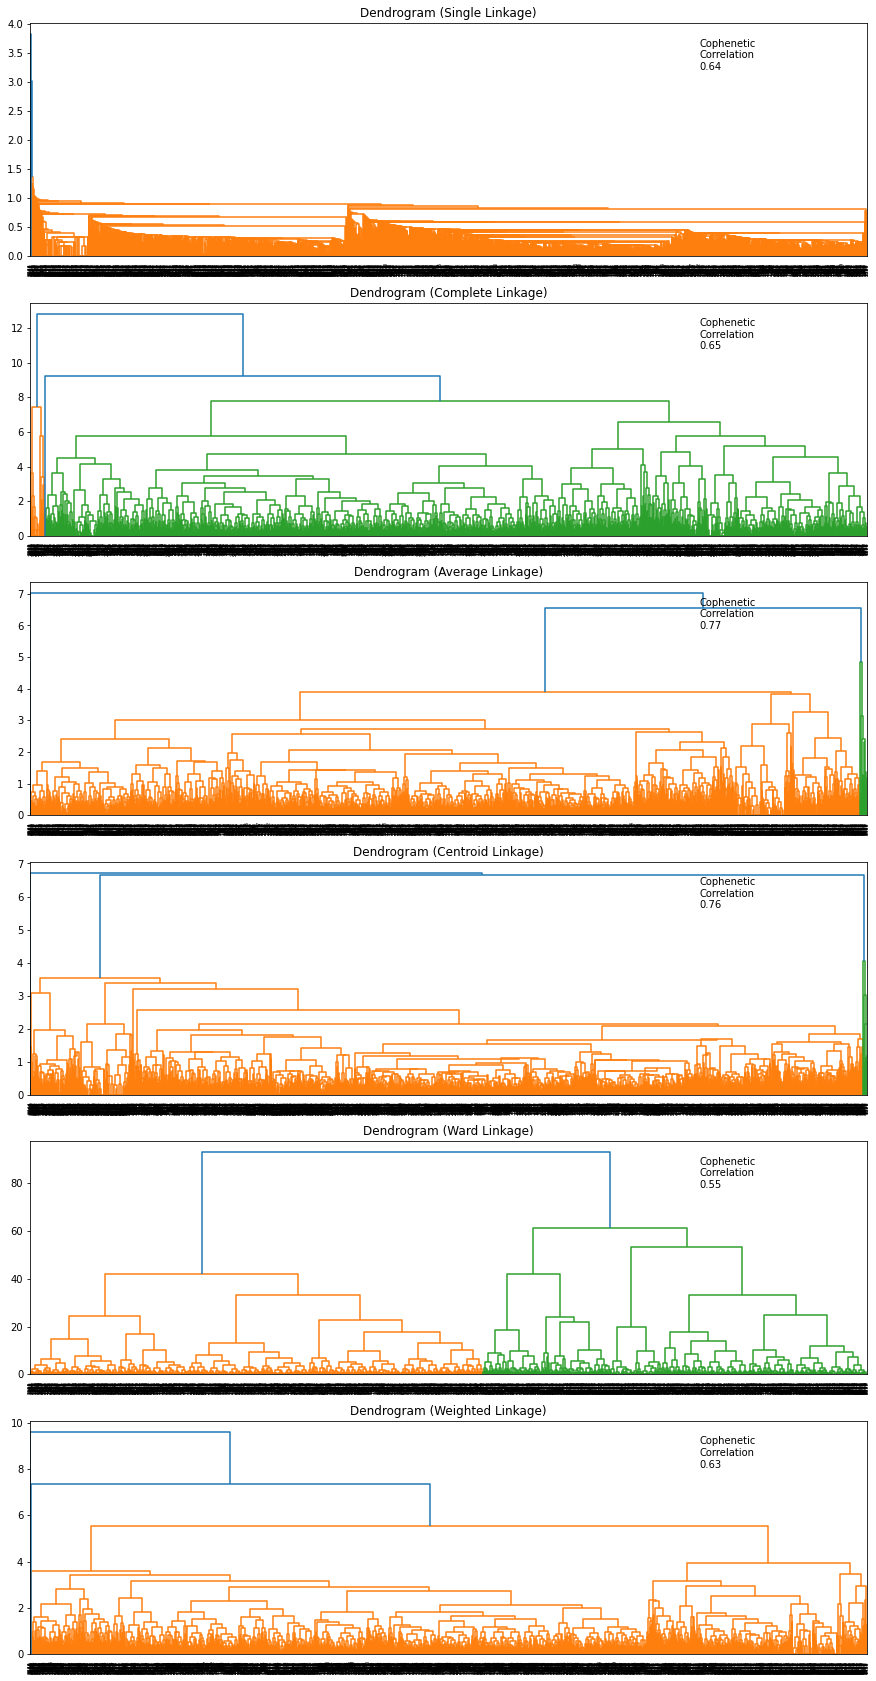

In [17]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Ward linkage shows distinct and separate clusters.

In [18]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.639182
1,complete,0.650394
2,average,0.770069
3,centroid,0.756031
4,ward,0.553656
5,weighted,0.631583


**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

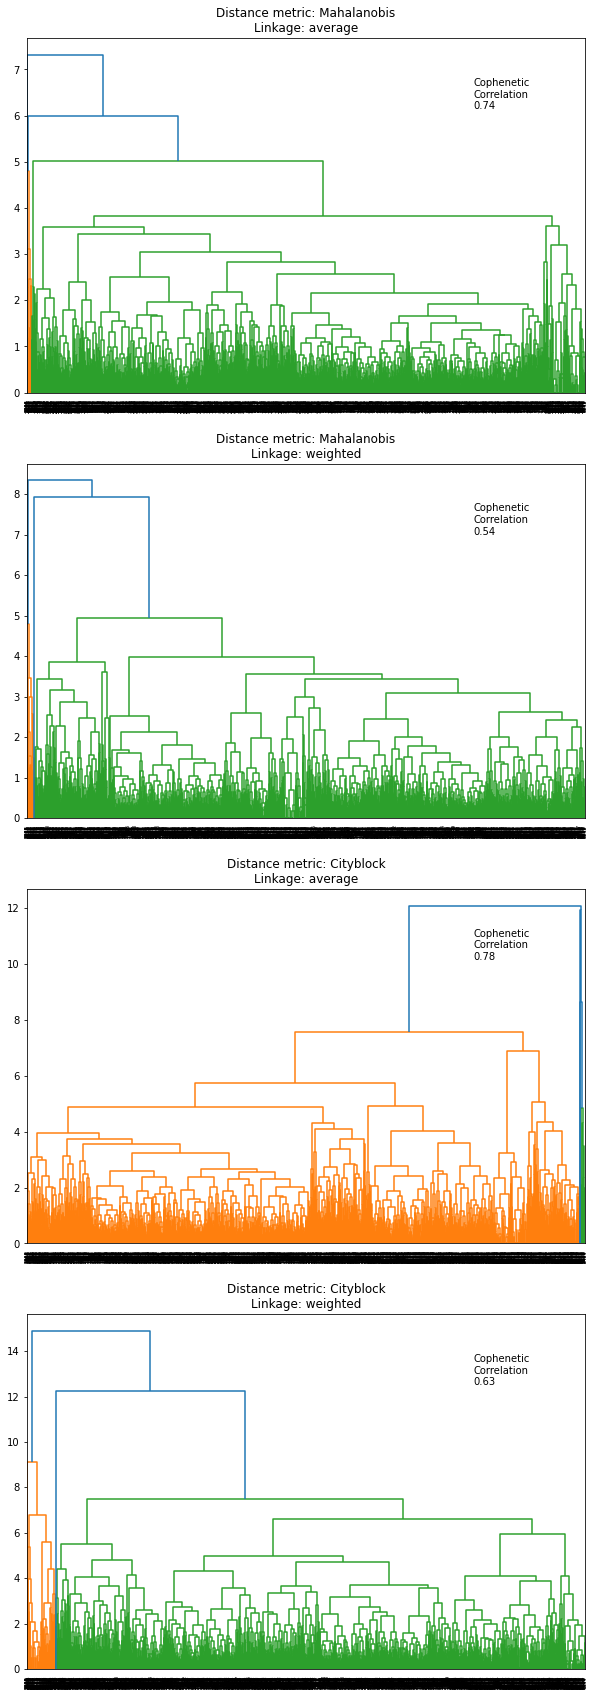

In [19]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- 3 would be the appropriate number of the clusters from the dendrogram with Ward linkage method. 

### Creating Final Model

**Let's create 3 clusters.**

In [20]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=3)

In [21]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [22]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [23]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Sale_Price"].count().values
)

In [24]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
HC_Clusters,,,,,,
0,-0.120786,0.293299,-1.201906,-0.200083,-0.376128,965
1,-0.397403,-0.588907,0.788092,0.022105,0.175628,1706
2,1.655267,1.503420,-0.384677,0.323683,0.131963,480


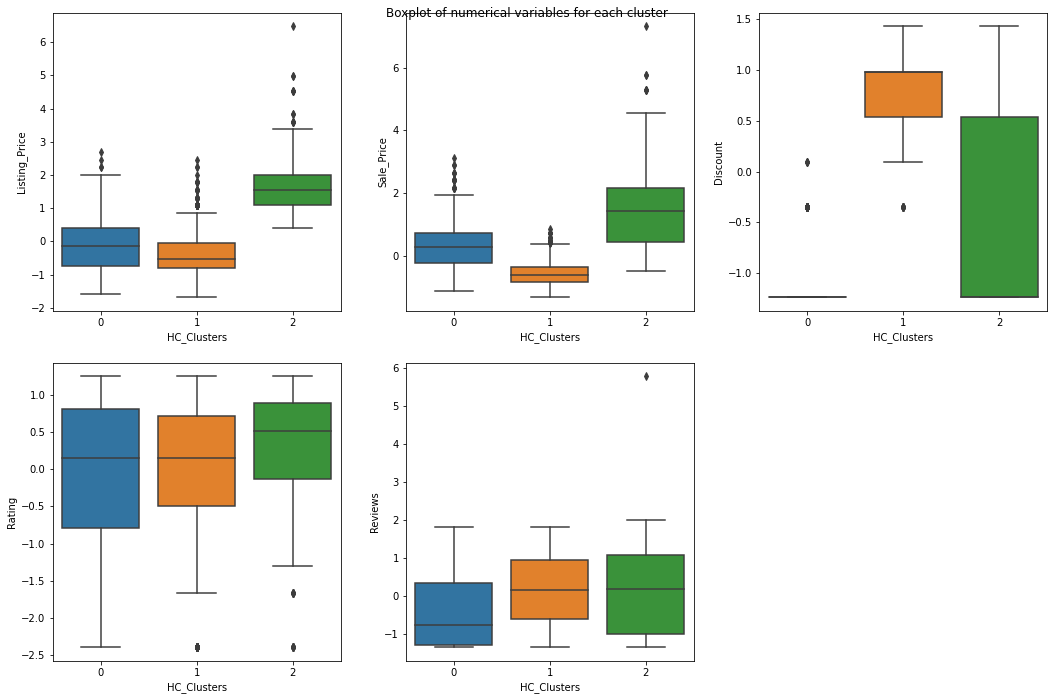

In [25]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster contains medium-priced products, with a median listing price of approximately 7500.
    - Almost no discount is given to products in these clusters.
    - The median rating of this cluster is around 3.5, suggesting that customers are satisfied with 50% of the products in this cluster.
    - Products in these clusters have got lesser reviews, which can be because these products are very expensive and fewer people buy them.
   

- **Cluster 1**:
    - Listing price is low for products in this cluster, and the sale price is lower, as there are heavier discounts on these products.
    - Almost all the products have discounts between 30% to 40%.
    - 50% of products have a rating from 3.5 to 5 which indicates that customer satisfaction varies across products in this cluster.
    - On average, 50 reviews are given to products in this cluster.
    

- **Cluster 2**:
    - This cluster contains more expensive premium products, with a median listing price of approximately 15000 and a median sale price of 11000.
    - The discount for products in this cluster varies from 0% to 60%.
    - Rating is very high.

## Business Insights and Recommendations

- Cluster 2 consists of premium products, so focused marketing campaigns can be done to target customers with higher purchasing power.

- Cluster 2 products can also be made available in showrooms situated in premium locations because people generally tend to buy premium products from showrooms.

- Cluster 1 consists of products that are sold at higher discounts, so these might be the ones that are introduced in large quantity during festive sales (like Christmas, Black Friday, New Year, etc). This strategy can be continued with high inventory.

- Cluster 0 consists of products with comparatively low and medium prices with almost no discount, so general marketing campaigns can be done for these to target the general public.

___